1.	(10 points) Suppose that a researcher is interested the degree to which light pollution hinders the ability to see stars during the night. Therefore, this researcher collected some data on the number of stars that are visible on cloudless nights from 121 different metropolitan areas. The sample mean of visible stars was $\bar{Y} = 7000$  and a sample standard deviation was $s = 4400$. 

In [19]:
t_crit <- round(qt(.05, df=120),4)
t_calc <- (7000-7400)/(4400/sqrt(121))

ts <- matrix(c(t_calc, t_crit),byrow=T, ncol=2, nrow=1)
colnames(ts) <-c("T calculated", "T critical")
ts

T calculated,T critical
-1.0000,-1.6577


a.	(3 points) From previous work, it was determined that increased light pollution has suggested that a population mean of 7,400 stars are visible on a cloudless night. Conduct a hypothesis test at $\alpha=0.05$ to determine if these data provide enough evidence to conclude that the population mean of visible stars on a cloudless night is less than 7,400.



## Seven steps of a hypothesis test:

1. $H_0: \mu > 7400$ vs. $H_a: \mu < 7400$
2. $n=121, \alpha=0.05$
3. $t_{crit} = -1.658$
4. $\bar{Y} = 7000 , s = 4400$
5. $t_{calc} = \sqrt{121}(7000-7400)/4400 = -1$
6. $|t_{crit}| > |t_{crit}|$ ; therefore, fail to reject $H_0$
7. At alpha=0.05, I fail to reject $H_0$, and I conclude that I have insufficient evidence to suggest that the population mean is less than 7400.


b.	(5 points) Calculate the probability of a Type II error (i.e., β) if the actual population mean number of visible stars is is 6,800. As part of this draw the density function under the null hypothesis and then also draw the density function assuming  is 6,800. On these density functions show the rejection region and shade in the area that corresponds to the probability of a Type II error.


In [20]:
alpha <- 0.05
mu_a <- 6800
mu_0 <- 7400
n <- 121
se <- 4400/sqrt(n)

ncp <- abs((mu_0-mu_a)/se)
beta <- pnorm(abs(qnorm(alpha)) - ncp)
beta

[1] 0.5575868

## Please note, the book is a little loose with the notation. 

$\beta = P(Z \leq |z_{\alpha}| - \frac{|\mu_0-\mu_a|}{\sigma/\sqrt{n}})$

Warning message:
: Width not defined. Set with `position_dodge(width = ?)`

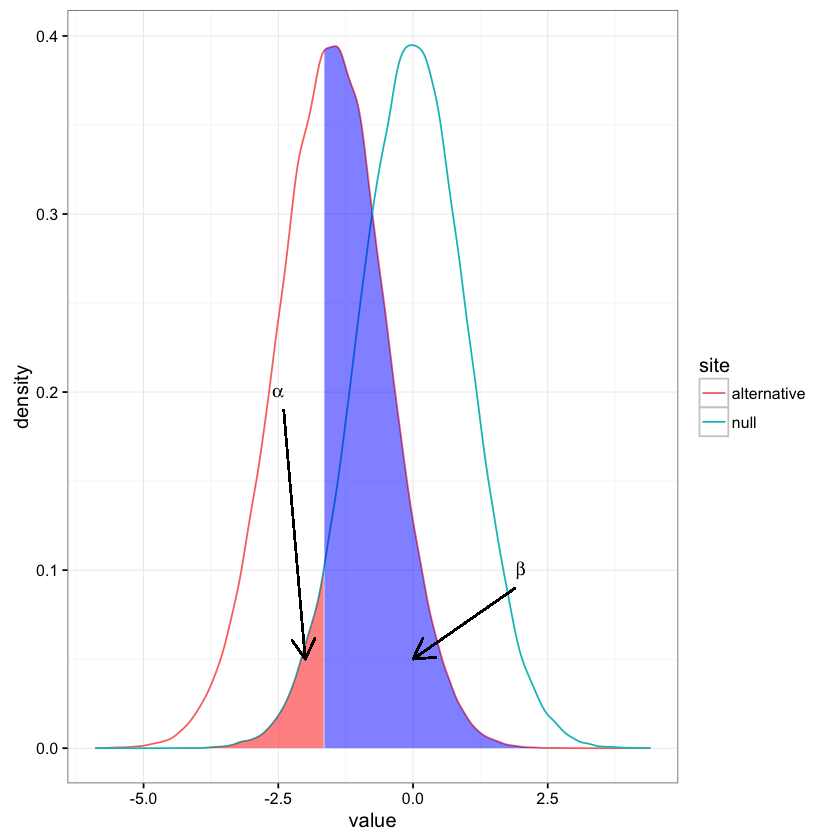

In [21]:
#  same data, just renaming columns for clarity later on
#  also, use data tables
library(data.table)
library(ggplot2)
set.seed(1)
n <- 121
se <- 4400/sqrt(n)

ncp_t <- (mu_a - mu_0)/se
value <- c(rt(100000, df=n-1), rt(100000, df=n-1, ncp = ncp_t))
site  <- c(rep("null", 100000), rep("alternative", 100000))
dt    <- data.table(site,value)
#  generate kdf
gg <- dt[,list(x=density(value)$x, y=density(value)$y),by="site"]
#  calculate quantiles
q1 <- quantile(dt[site=="null",value],0.05)
q2 <- quantile(dt[site=="alternative",value],1-beta)
# generate the plot
ggplot(dt) + stat_density(aes(x=value,color=site),geom="line",position="dodge")+
  geom_ribbon(data=subset(gg,site=="null" & x<q1),
              aes(x=x,ymax=y),ymin=0,fill="red", alpha=0.5)+
  geom_ribbon(data=subset(gg,site=="alternative" & x>q2),
              aes(x=x,ymax=y),ymin=0,fill="blue", alpha=0.5) +
  annotate("text", x = -2.5, y = 0.2, label = c("alpha"), parse=TRUE) + 
  annotate("text", x = 2, y = 0.1, label = c("beta"), parse=TRUE) + 
  geom_segment(aes(x = -2.4, y = .19, xend = -2, yend = .05), arrow = arrow(length = unit(0.5, "cm"))) + 
  geom_segment(aes(x = 1.9, y = .09, xend = 0, yend = .05), arrow = arrow(length = unit(0.5, "cm"))) + 
  theme_bw() 

c.(2 points) If the researcher conducting this experiment decreased the Type I Error rate, would the Type II Error rate increase or decrease? Justify your answer in one or two sentences. 


If the researcher decreased the type I error rate, then the Type II error rate would increase.

## Mathematically,

$lim_{\alpha \rightarrow 0} \beta = lim_{\alpha \rightarrow 0} P(Z \leq |z_{\alpha}| - \frac{|\mu_0-\mu_a|}{\sigma/\sqrt{n}}) = P(Z \leq \infty) = 1$. Thus, as Type I error decreases,  Type II error increases.